In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.image import imread
import math
import cv2
import keras

In [2]:
data_dir = 'C:\\Users\\91882\\Desktop\\PA review 1\\ExDark\\ExDark\\'

In [3]:
train_path = data_dir+'train\\'
test_path = data_dir+'test\\'

In [4]:
def preprocessing_fun(img):
    img1 = img.astype('uint8')
    eq_img = cv2.equalizeHist(img1)
    return img

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
img_datagen = ImageDataGenerator(rescale=1./255,preprocessing_function = preprocessing_fun)
training_gen = img_datagen.flow_from_directory(train_path, target_size=(400,400),
                                               color_mode='grayscale',batch_size=16,class_mode='input',shuffle=False)

Found 5888 images belonging to 12 classes.


In [7]:
testing_gen = img_datagen.flow_from_directory(test_path, target_size=(400,400),
                                               color_mode='grayscale',batch_size=16,class_mode='input',shuffle=False)

Found 1470 images belonging to 12 classes.


In [8]:
### AUTOENCODER

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, UpSampling2D

In [112]:
encoder = Sequential()
encoder.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(400,400,1),padding='same'))
encoder.add(MaxPool2D(pool_size=(2,2),padding='same'))
            
encoder.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same'))
encoder.add(MaxPool2D(pool_size=(2,2),padding='same'))
            
encoder.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
encoder.add(MaxPool2D(pool_size=(2,2),padding='same'))

In [114]:
encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 400, 400, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 200, 200, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 200, 200, 16)      4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 8)       1160      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 8)       

In [13]:
encoder.output.shape[1:]

TensorShape([50, 50, 8])

In [14]:
decoder = Sequential()

decoder.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=encoder.output.shape[1:],padding='same'))
decoder.add(UpSampling2D(2))

decoder.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same'))
decoder.add(UpSampling2D(2))

decoder.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
decoder.add(UpSampling2D(2))

decoder.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))

In [15]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 8)         584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 100, 100, 8)      0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      1168      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 200, 200, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 400, 400, 32)    

### Autoencoder as per the research paper

In [121]:
encoder = Sequential()
encoder.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(400,400,1),padding='same'))
encoder.add(MaxPool2D(pool_size=(2,2),padding='same'))
            
encoder.add(Conv2D(filters=3,kernel_size=(2,2),activation='sigmoid',padding='same'))
encoder.add(MaxPool2D(pool_size=(2,2),padding='same'))

In [122]:
encoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 400, 400, 32)      544       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 200, 200, 32)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 200, 200, 3)       387       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 100, 3)      0         
 g2D)                                                            
                                                                 
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [123]:
encoder.output.shape[1:]

TensorShape([100, 100, 3])

In [127]:
decoder = Sequential()

decoder.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape=encoder.output.shape[1:],padding='same'))
decoder.add(UpSampling2D(2))

decoder.add(Conv2D(filters=3,kernel_size=(4,4),activation='sigmoid',padding='same'))
decoder.add(UpSampling2D(2))

decoder.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))

In [128]:
decoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 100, 100, 32)      416       
                                                                 
 up_sampling2d_7 (UpSampling  (None, 200, 200, 32)     0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 200, 200, 3)       1539      
                                                                 
 up_sampling2d_8 (UpSampling  (None, 400, 400, 3)      0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 400, 400, 1)       28        
                                                                 
Total params: 1,983
Trainable params: 1,983
Non-train

In [129]:
autoencoder = Sequential([encoder,decoder])

In [130]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
# Version 1
# autoencoder.fit(training_gen,epochs=10,validation_data=[testing_gen])

Epoch 1/10
368/368 [==============================] - 138s 360ms/step - loss: 0.3393 - accuracy: 0.0694 - val_loss: 0.2780 - val_accuracy: 0.0702
Epoch 2/10
368/368 [==============================] - 131s 356ms/step - loss: 0.3073 - accuracy: 0.0701 - val_loss: 0.2756 - val_accuracy: 0.0703
Epoch 3/10
368/368 [==============================] - 132s 360ms/step - loss: 0.3056 - accuracy: 0.0701 - val_loss: 0.2744 - val_accuracy: 0.0703
Epoch 4/10
368/368 [==============================] - 141s 382ms/step - loss: 0.3051 - accuracy: 0.0701 - val_loss: 0.2743 - val_accuracy: 0.0703
Epoch 5/10
368/368 [==============================] - 142s 386ms/step - loss: 0.3043 - accuracy: 0.0701 - val_loss: 0.2739 - val_accuracy: 0.0703
Epoch 6/10
368/368 [==============================] - 144s 389ms/step - loss: 0.3041 - accuracy: 0.0701 - val_loss: 0.2745 - val_accuracy: 0.0703
Epoch 7/10
368/368 [==============================] - 131s 356ms/step - loss: 0.3043 - accuracy: 0.0701 - val_loss: 0.2733 -

In [131]:
from tensorflow.keras.callbacks import EarlyStopping

In [132]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [133]:
# Version 3
autoencoder.fit(training_gen,epochs=50,validation_data=[testing_gen],callbacks=[early_stop])

Epoch 1/50
368/368 [==============================] - 112s 298ms/step - loss: 0.3578 - accuracy: 0.0681 - val_loss: 0.2879 - val_accuracy: 0.0677
Epoch 2/50
368/368 [==============================] - 110s 298ms/step - loss: 0.3159 - accuracy: 0.0695 - val_loss: 0.2824 - val_accuracy: 0.0702
Epoch 3/50
368/368 [==============================] - 114s 311ms/step - loss: 0.3124 - accuracy: 0.0701 - val_loss: 0.2799 - val_accuracy: 0.0703
Epoch 4/50
368/368 [==============================] - 116s 316ms/step - loss: 0.3101 - accuracy: 0.0701 - val_loss: 0.2781 - val_accuracy: 0.0703
Epoch 5/50
368/368 [==============================] - 122s 331ms/step - loss: 0.3083 - accuracy: 0.0701 - val_loss: 0.2767 - val_accuracy: 0.0703
Epoch 6/50
368/368 [==============================] - 116s 316ms/step - loss: 0.3068 - accuracy: 0.0701 - val_loss: 0.2755 - val_accuracy: 0.0703
Epoch 7/50
368/368 [==============================] - 116s 315ms/step - loss: 0.3056 - accuracy: 0.0702 - val_loss: 0.2746 -

In [19]:
### CNN

In [20]:
### YOLO v3

In [21]:
# Unable to allocate 3.51 GiB for an array with shape (5888, 400, 400) and data type float32

In [139]:
sixteen_imgs = training_gen.next()[1]

In [140]:
sixteen_imgs.shape

(16, 400, 400, 1)

In [141]:
imgs_through_ae = autoencoder(sixteen_imgs)

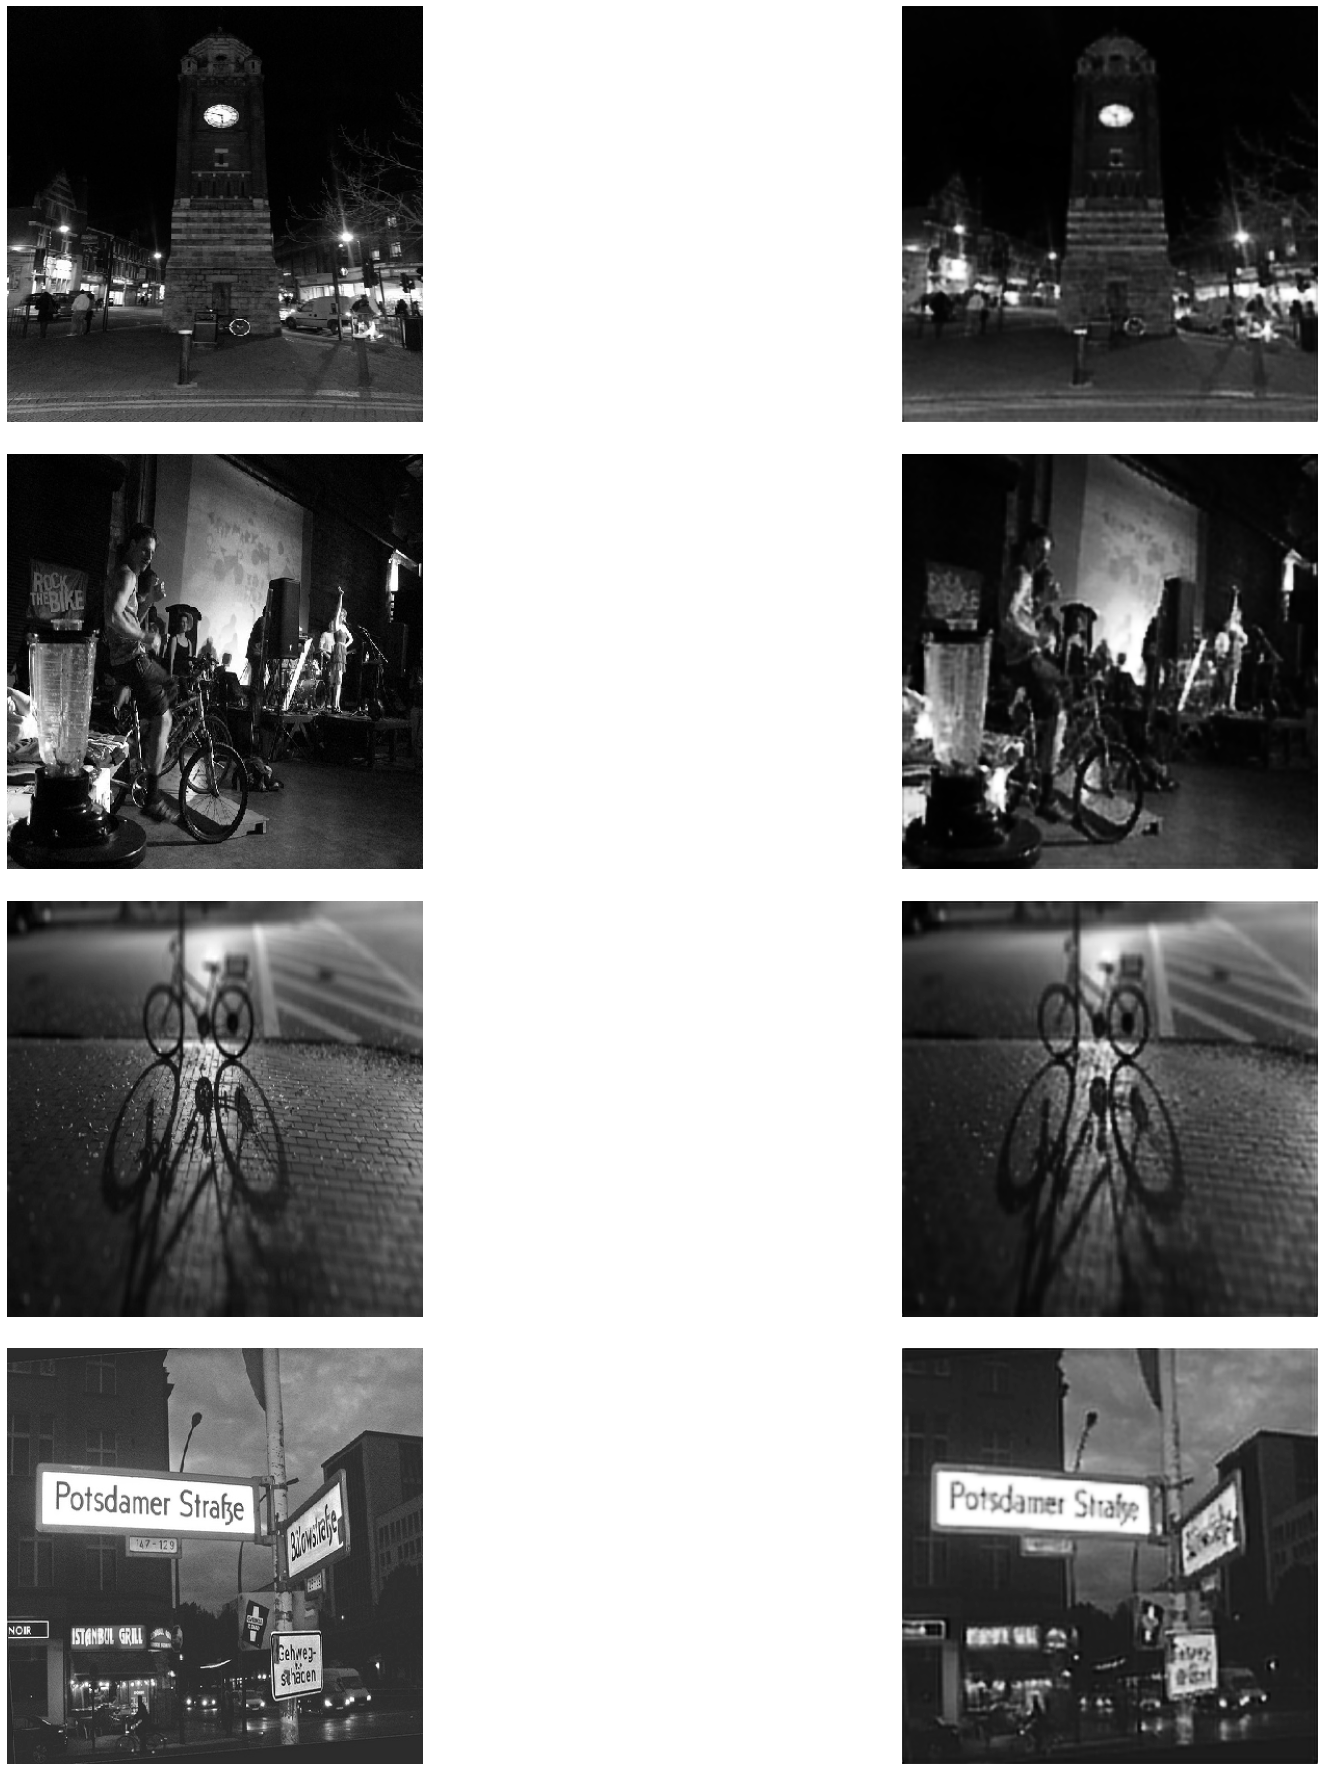

In [142]:
fig, axes = plt.subplots(4,2,figsize=(25, 25))
plt.tight_layout()

for i in range(4):
    axes[i,0].imshow(sixteen_imgs[i],cmap='gray')
    axes[i,0].axis('off')
    
    axes[i,1].imshow(imgs_through_ae[i],cmap='gray')
    axes[i,1].axis('off')
    
    x=x+1

In [138]:
autoencoder.save('Autoencoder v3.h5')